##**Titanic - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sex                                        |                                                |                                                                                                                                             |
| Age      | Age in years                               |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | # of parents / children aboard the Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                |                                                                                                                                             |
| fare     | Passenger fare                             |                                                |                                                                                                                                             |
| cabin    | Cabin number                               |                                                |                                                                                                                                             |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive

In [ ]:
drive.mount('/content/grdrive')

Mounted at /content/grdrive


In [ ]:
titanic=pd.read_csv('/content/grdrive/MyDrive/Colab Notebooks/titanic.csv')

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.shape

(891, 12)

##**Probabilidade Simples**

Qual a probabilidade de selecionar uma mulher no Titanic?

In [ ]:
probMu = len(titanic[titanic['Sex']=='female'])/len(titanic)

print('A probabilidade de ser mulher no Titanic é de: ' + str(round(probMu*100,2))+ '%')

A probabilidade de ser mulher no Titanic é de: 35.24%


Comparativos externos: a população mundial tinha essa mesma proporção?

In [ ]:
#referência externa: (https://www.census.gov/data/tables/time-series/demo/popest/pre-1980-national.html)

probMu1912 = (45573000/ 93863000)
print('A probabilidade de ser mulher em 1912 é de : ' + str(round(probMu1912*100,2))+ '%')

A probabilidade de ser mulher em 1912 é de : 48.55%


##**Probabilidade da União**

Qual a probabilidade de estar acompanhado pelo Sibsp ou pelo Parch?

In [ ]:
Acomp = len(titanic[(titanic['Parch']>0) | (titanic['SibSp']>0)])

probAcomp = (Acomp/len(titanic))
print('A probabilidade de estar acompanhado pelo Parch ou SibSp é de: ' + str(round(probAcomp*100,2))+ '%')


A probabilidade de estar acompanhado pelo Parch ou SibSp é de: 39.73%


##**Probabilidade da Intersecção**

Qual a probabilidade de ser mulher e estar acompanhada?

In [ ]:
MuAcomp = len(titanic[((titanic['Parch']>0) | (titanic['SibSp']>0)) & (titanic['Sex']=='female')])

probMuAcomp = MuAcomp/len(titanic)
print('A probabilidade de ser mulher e estar acompanhada é de: ' + str(round(probMuAcomp*100,2))+ '%')

A probabilidade de ser mulher e estar acompanhada é de: 21.1%


##**Probabilidade do Complemento**

Qual a probabilidade de ser mulher e não estar acompanhada?

In [ ]:
probMuNAcomp = probMu - probMuAcomp
print('A probabilidade de ser mulher e não estar acompanhada é de: ' + str(round(probMuNAcomp*100,2))+ '%')

A probabilidade de ser mulher e não estar acompanhada é de: 14.14%


##**Probabilidade da Diferença**

Qual a probabilidade de estar acompnhado pelo SibSp mas não pelo Parch?

In [ ]:
AcompSib = len(titanic[(titanic['Parch']==0) & (titanic['SibSp']>0)])

probAcompSib = AcompSib/len(titanic)

print('A probabilidade de estar acompanhado pelo SibSp é de: ' + str(round(probAcompSib*100,2))+ '%')

A probabilidade de estar acompanhado pelo SibSp é de: 15.82%


##**Probabilidade Condicional**

Qual a probabilidade de estar acompanhada sabendo que é uma mulher?

In [ ]:
probCond = probMuAcomp/probMu
print('A probabilidade de estar acompanhdo sabendo que é uma mulher é de: ' + str(round(probCond*100,2))+ '%')

A probabilidade de estar acompanhdo sabendo que é uma mulher é de: 59.87%


##**Teorema de Bayes**

Qual a probabilidade de ser mulher tal que esteja acompanhada?


In [ ]:
probMutqAcomp = (probMu*probCond)/probAcomp
print('A probabilidade de ser mulher tal que esteja acompnhada: ' + str(round(probMutqAcomp*100,2))+ '%')

A probabilidade de ser mulher tal que esteja acompnhada: 53.11%


##**Variáveis Aleatórias**

In [ ]:
titanic['Acompanhado']=titanic['SibSp']+titanic['Parch']

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
titanic['Acompanhado'].value_counts(sort=False).sort_index()

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Acompanhado, dtype: int64

###**Função Probabilidade**

In [ ]:
fp = titanic['Acompanhado'].value_counts(sort=False).sort_index()/titanic['Acompanhado'].count()
print(fp)

0     0.602694
1     0.180696
2     0.114478
3     0.032548
4     0.016835
5     0.024691
6     0.013468
7     0.006734
10    0.007856
Name: Acompanhado, dtype: float64


###**Função Repartição (Função Cumulativa)**

In [ ]:
fp.cumsum()

0     0.602694
1     0.783389
2     0.897868
3     0.930415
4     0.947250
5     0.971942
6     0.985410
7     0.992144
10    1.000000
Name: Acompanhado, dtype: float64

###**Gráfico Simples**

In [ ]:
import matplotlib.pyplot as plt


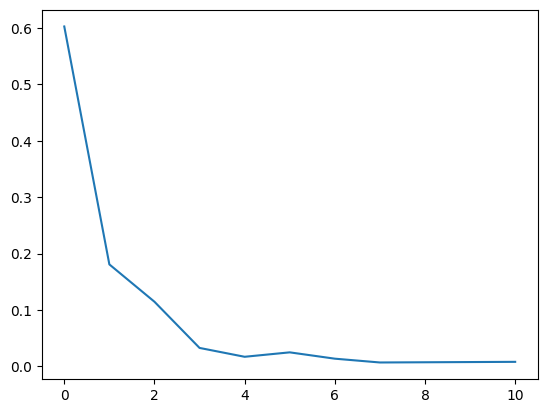

In [ ]:
plt.plot(fp)

In [ ]:
grafico=fp.cumsum()

Text(0.5, 1.0, 'Gráfico Acumulado')

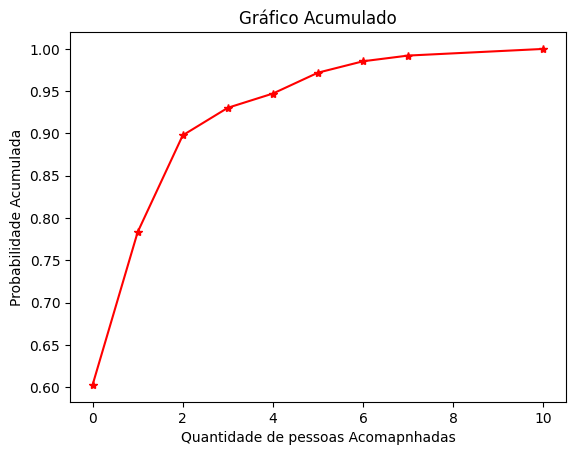

In [ ]:
plt.plot(grafico, 'r*-')
plt.xlabel('Quantidade de pessoas Acomapnhadas')
plt.ylabel('Probabilidade Acumulada')
plt.title('Gráfico Acumulado')

##**Covariância**

In [ ]:
titanic[['Acompanhado', 'Survived']].cov()

,Acompanhado,Survived
Acompanhado,2.603248,0.013063
Survived,0.013063,0.236772


##**Correlação**

In [ ]:
titanic[['Acompanhado', 'Survived']].corr()

,Acompanhado,Survived
Acompanhado,1.000000,0.016639
Survived,0.016639,1.000000


##**Tratamento de Dados**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Acompanhado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Acompanhado  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
titanic.drop(['PassengerId', 'Name','Ticket', 'Cabin', 'Acompanhado'], axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

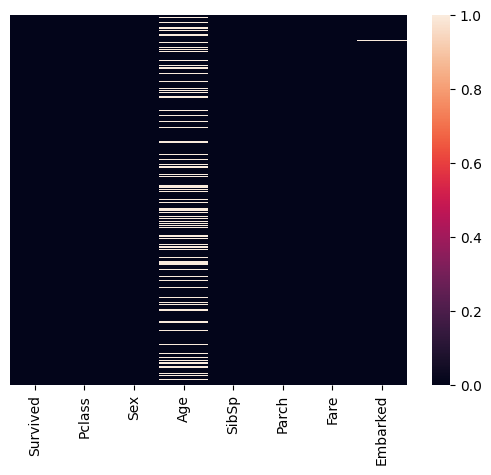

In [ ]:
import seaborn as sns

sns.heatmap(titanic.isnull(), yticklabels=False)

In [ ]:
titanic.loc[titanic.Age.isna() & (titanic.Pclass==1), 'Age']=titanic[titanic.Pclass==1].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass==2), 'Age']=titanic[titanic.Pclass==2].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass==3), 'Age']=titanic[titanic.Pclass==3].Age.median()

<Axes: >

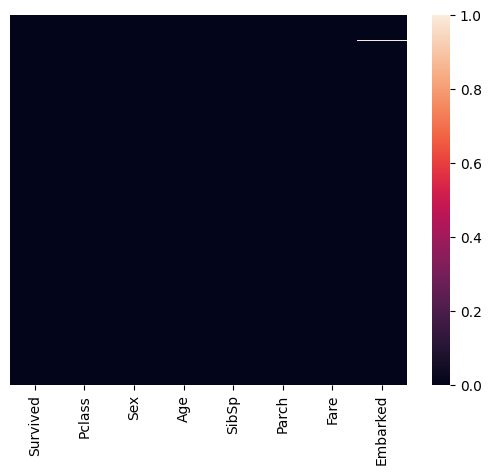

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False)

In [ ]:
titanic.dropna(inplace=True)

<Axes: >

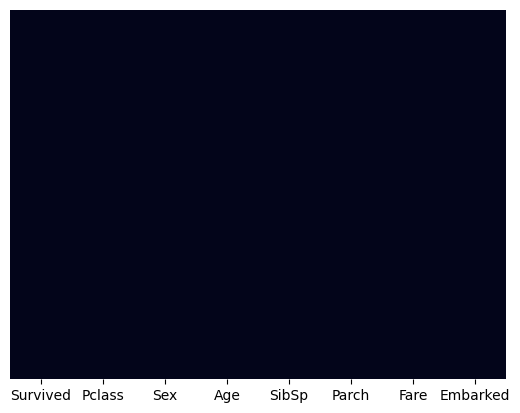

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
embarque = pd.get_dummies(titanic['Embarked'])
embarque

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
sexo = pd.get_dummies(titanic['Sex'])
sexo

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic = pd.concat([titanic, embarque, sexo], axis=1)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [ ]:
titanic.drop(['Embarked', 'Sex'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409,0.350956,0.649044
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063,0.477538,0.477538
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


##**Normal Padrão**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

ajuste = scaler.fit(titanic)
normal = scaler.transform(titanic)

normalpadrao = pd.DataFrame(normal)

normalpadrao.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.786961,0.825209,-0.531670,0.431350,-0.474326,-0.500240,-0.482711,-0.307941,0.616794,-0.735342,0.735342
1,1.270711,-1.572211,0.680232,0.431350,-0.474326,0.788947,2.071634,-0.307941,-1.621287,1.359911,-1.359911
2,1.270711,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794,1.359911,-1.359911
3,1.270711,-1.572211,0.453001,0.431350,-0.474326,0.422861,-0.482711,-0.307941,0.616794,1.359911,-1.359911
4,-0.786961,0.825209,0.453001,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794,-0.735342,0.735342


In [ ]:
normalpadrao.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-1.228863e-16,-2.437745e-16,2.677523e-16,-3.197043e-17,-4.795564e-17,1.398706e-16,6.993531e-18,3.996303e-18,-7.493069e-17,-4.395934e-17,4.395934e-17
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-7.869611e-01,-1.572211e+00,-2.166224e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-7.353420e-01,-1.359911e+00
25%,-7.869611e-01,-3.735013e-01,-5.316702e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-7.353420e-01,-1.359911e+00
50%,-7.869611e-01,8.252086e-01,-2.286946e-01,-4.751991e-01,-4.743259e-01,-3.551972e-01,-4.827108e-01,-3.079409e-01,6.167940e-01,-7.353420e-01,7.353420e-01
75%,1.270711e+00,8.252086e-01,5.666164e-01,4.313502e-01,-4.743259e-01,-2.207954e-02,-4.827108e-01,-3.079409e-01,6.167940e-01,1.359911e+00,7.353420e-01
max,1.270711e+00,8.252086e-01,3.861476e+00,6.777195e+00,6.967010e+00,9.668551e+00,2.071634e+00,3.247377e+00,6.167940e-01,1.359911e+00,7.353420e-01


##**Distribuição de Probabilidade**

In [ ]:
house = pd.read_csv('/content/grdrive/MyDrive/Colab Notebooks/house.csv')

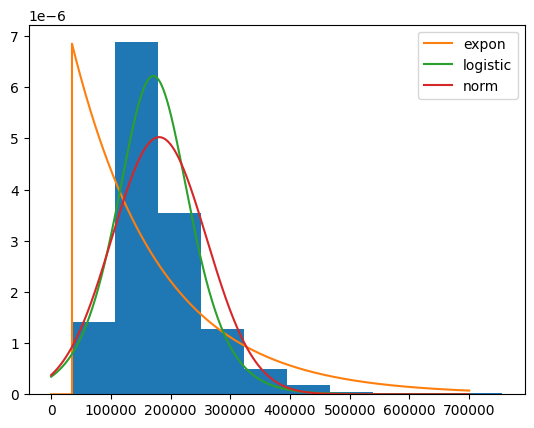

In [ ]:
import scipy
import scipy.stats
size=700000
x = np.arange(size)
y = house['SalePrice'].values
h = plt.hist(y, density=True)

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]
  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

In [ ]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
import plotly.express as px

fig = px.histogram(house, x='SalePrice', marginal='rug')
fig.show()

In [ ]:
fig2 = px.box(house, x='GarageCars', y='SalePrice')
fig2.show()

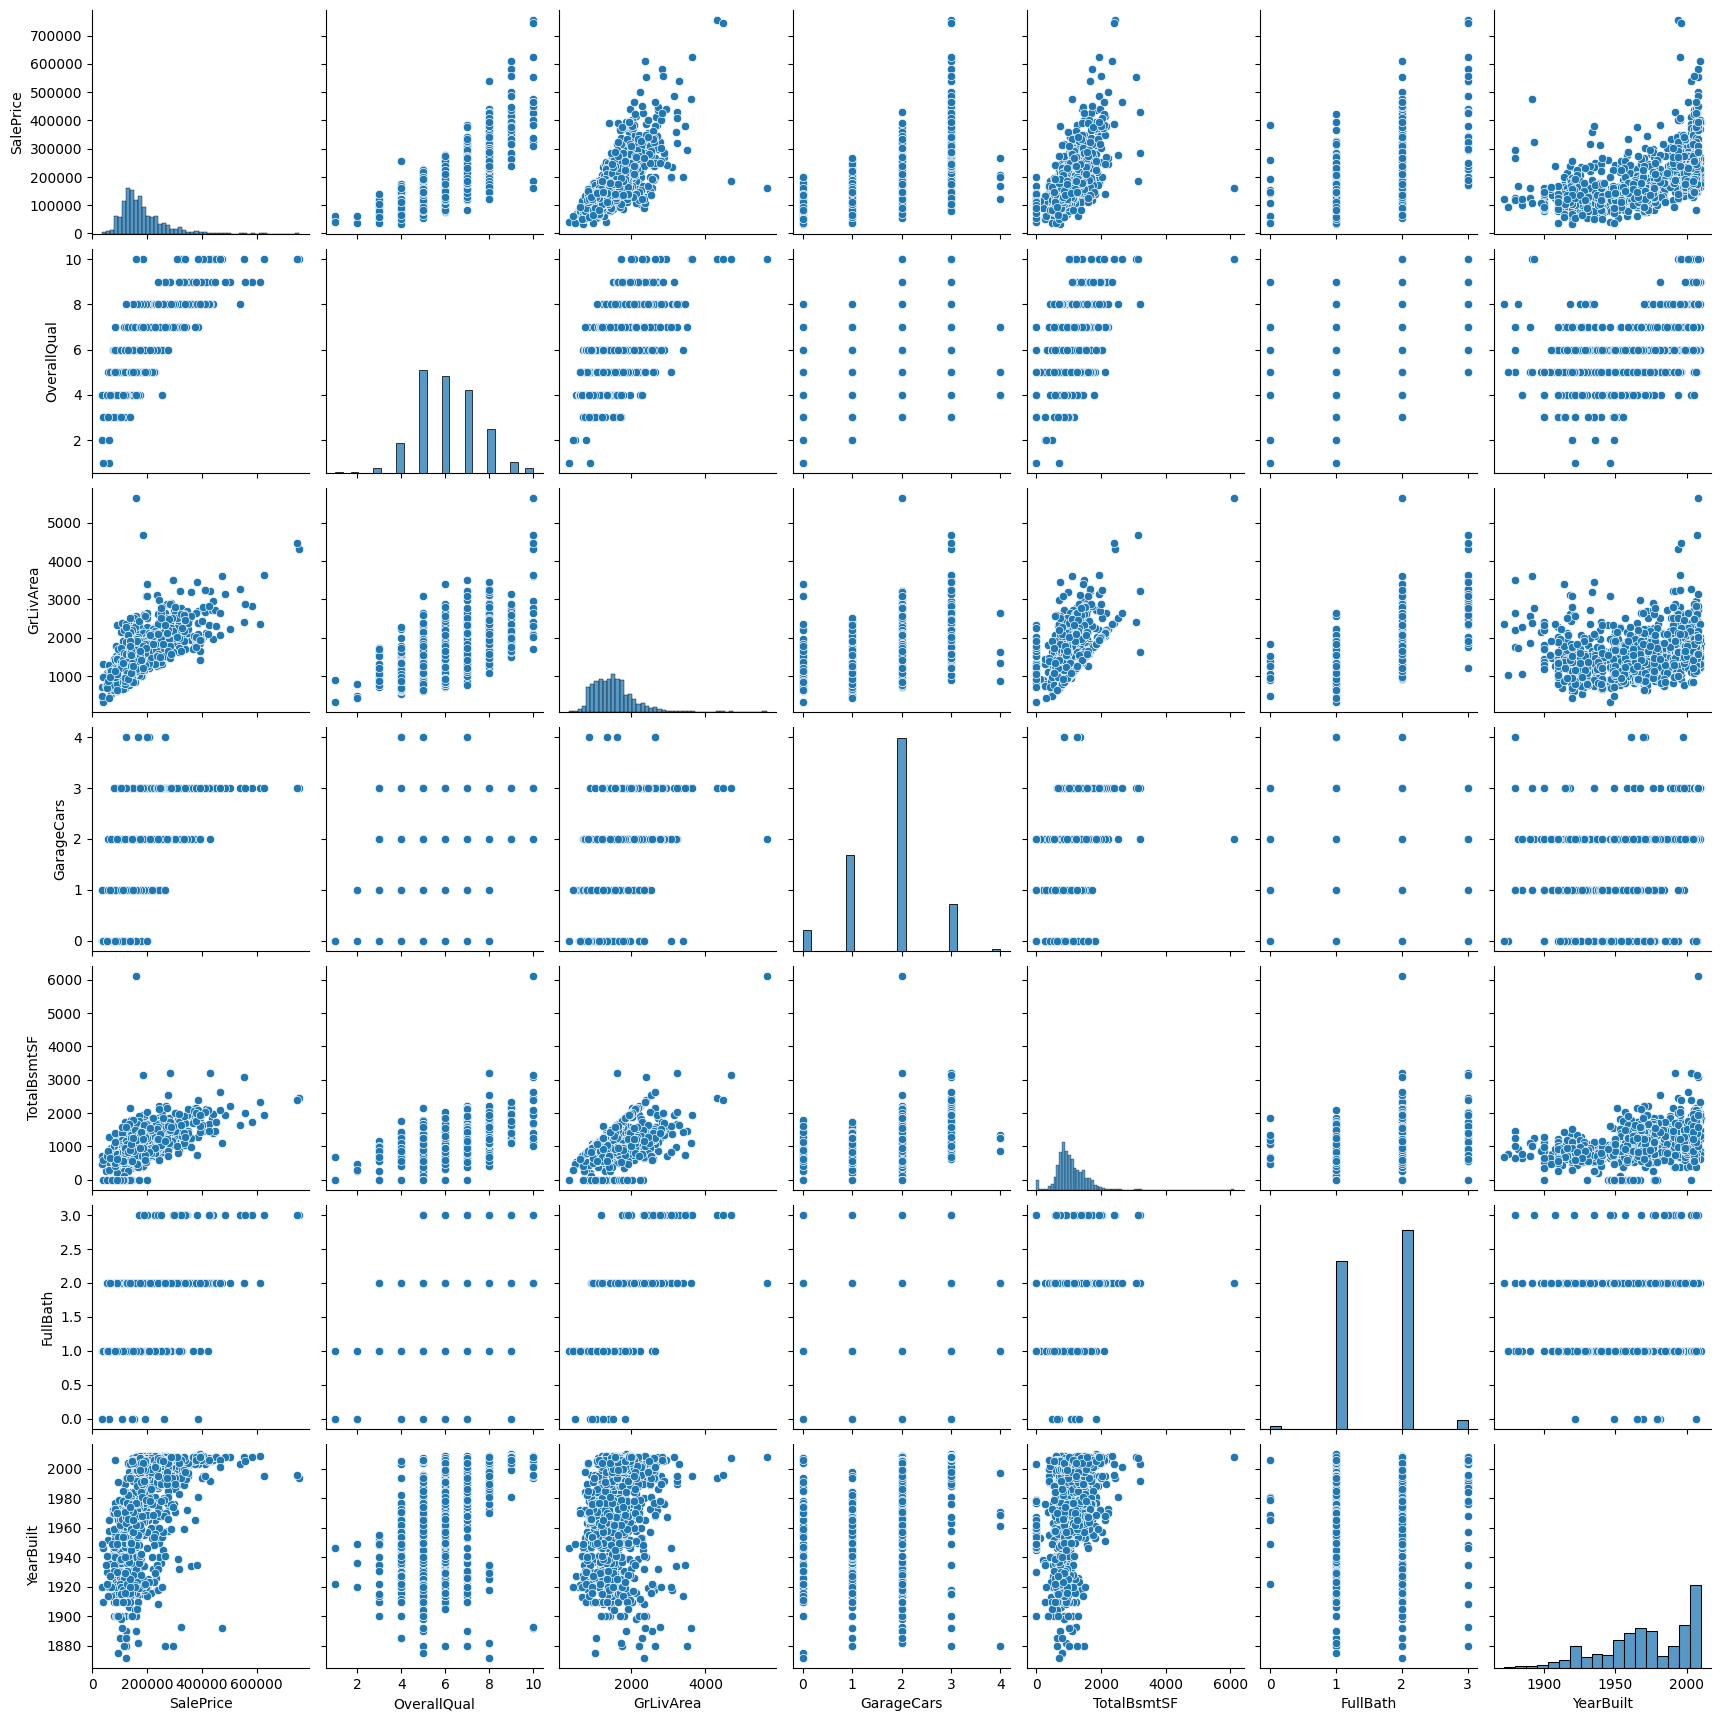

In [ ]:
import seaborn as sns

col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[col])

In [ ]:
house[['SalePrice', 'GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


##**Distribuição Amostral**

In [ ]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

seed(1)

rol=randint(1,7,50)
print(rol)
print(mean(rol))

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


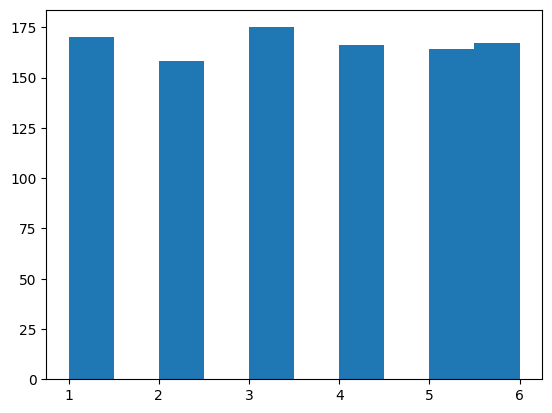

In [ ]:
from matplotlib import pyplot

means = [mean(randint(1,7,1)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

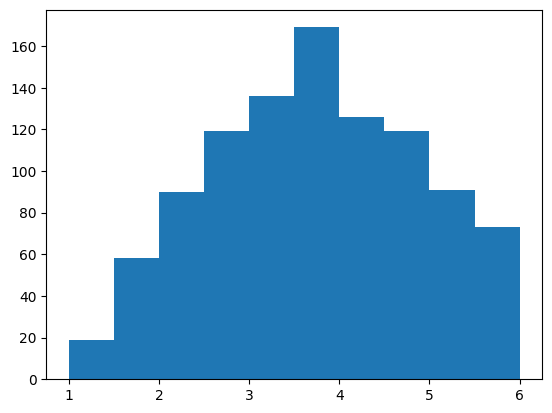

In [ ]:
means = [mean(randint(1,7,2)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

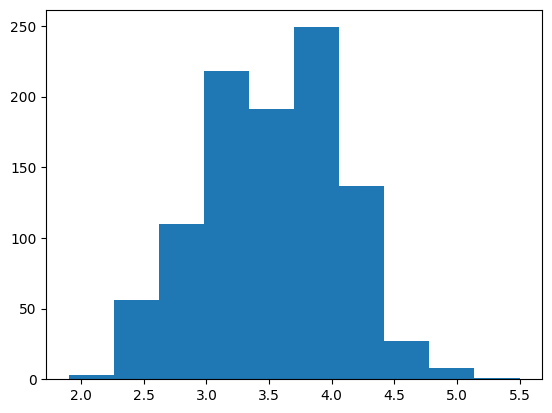

In [ ]:
means = [mean(randint(1,7,10)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

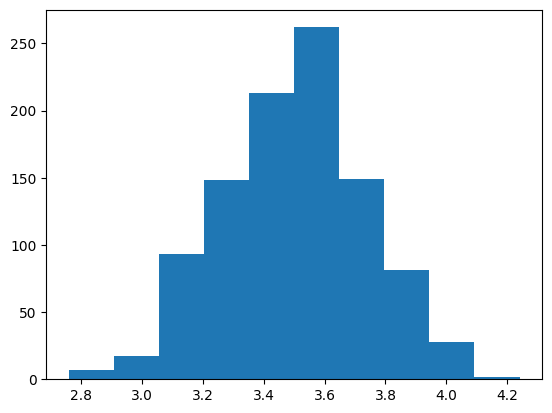

In [ ]:
means = [mean(randint(1,7,50)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

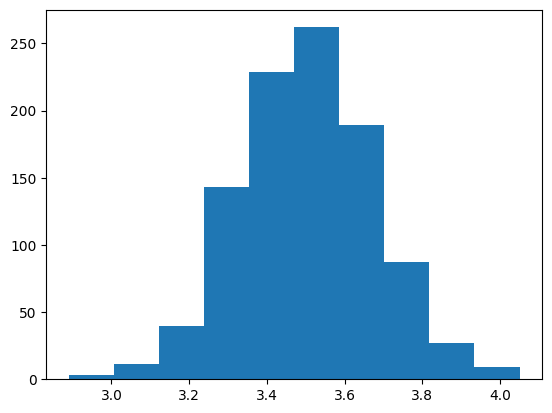

In [ ]:
means = [mean(randint(1,7,100)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

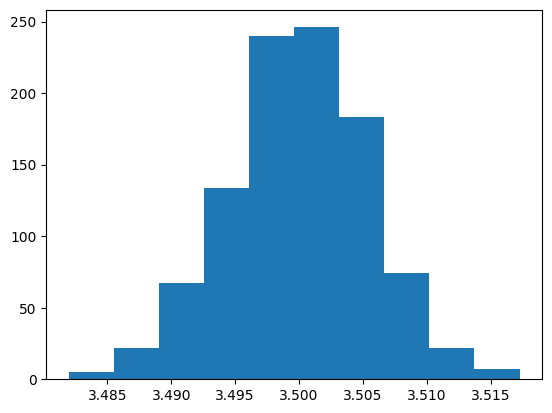

In [ ]:
means = [mean(randint(1,7,100000)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

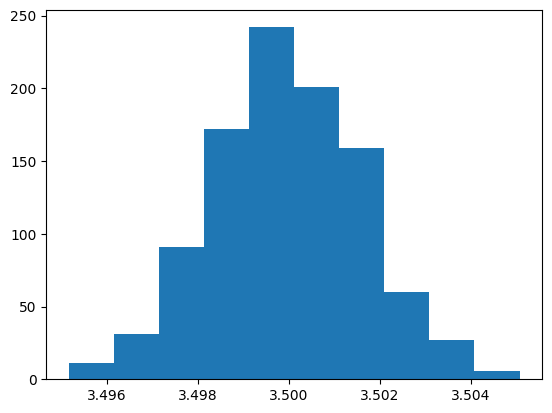

In [ ]:
means = [mean(randint(1,7,1000000)) for _ in range(1000)]

pyplot.hist(means)
pyplot.show()

##**Método de Monte Carlo**

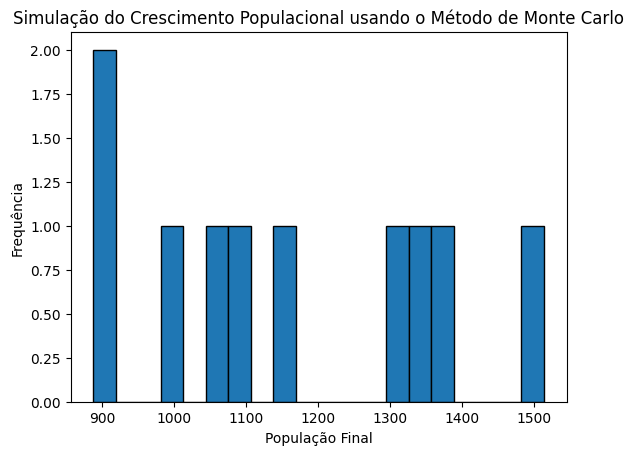

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simular_populacao(populacao_inicial, taxa_nascimento, taxa_morte, passos_tempo, n_simulacoes):
    populacoes_finais = []

    for _ in range(n_simulacoes):
        populacao = populacao_inicial

        for _ in range(passos_tempo):
            nascimentos = np.random.poisson(taxa_nascimento * populacao)
            mortes = np.random.poisson(taxa_morte * populacao)
            populacao = populacao + nascimentos - mortes
            populacao = max(populacao, 0)

        populacoes_finais.append(populacao)

    return populacoes_finais

populacao_inicial=100
taxa_nascimento=0.1
taxa_morte=0.05
passos_tempo=50
n_simulacoes=10

populacoes_finais = simular_populacao(populacao_inicial, taxa_nascimento, taxa_morte, passos_tempo, n_simulacoes)

plt.hist(populacoes_finais, bins=20, edgecolor='black')
plt.xlabel('População Final')
plt.ylabel('Frequência')
plt.title('Simulação do Crescimento Populacional usando o Método de Monte Carlo')
plt.show()

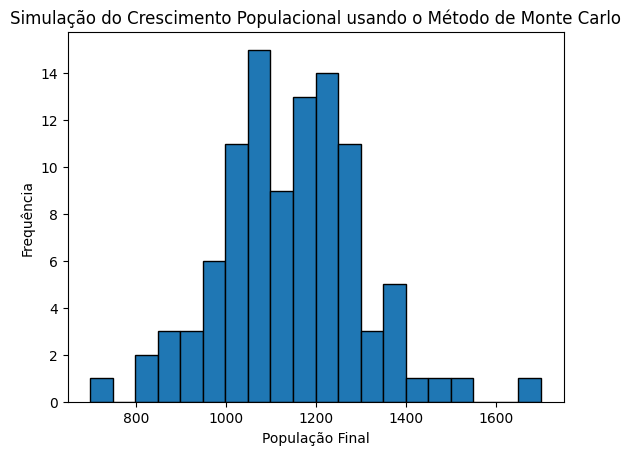

In [ ]:
populacao_inicial=100
taxa_nascimento=0.1
taxa_morte=0.05
passos_tempo=50
n_simulacoes=100

populacoes_finais = simular_populacao(populacao_inicial, taxa_nascimento, taxa_morte, passos_tempo, n_simulacoes)

plt.hist(populacoes_finais, bins=20, edgecolor='black')
plt.xlabel('População Final')
plt.ylabel('Frequência')
plt.title('Simulação do Crescimento Populacional usando o Método de Monte Carlo')
plt.show()

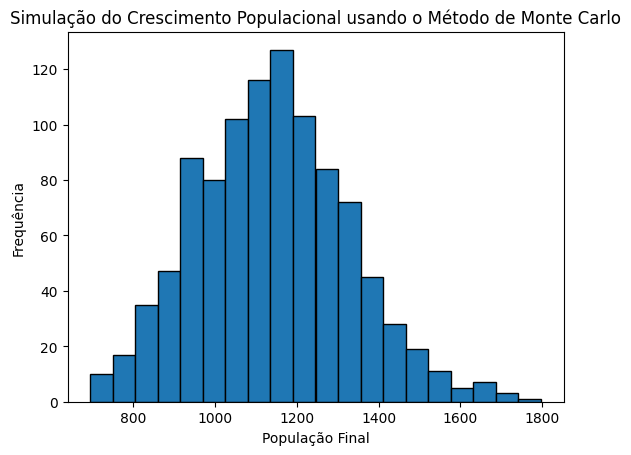

In [ ]:
populacao_inicial=100
taxa_nascimento=0.1
taxa_morte=0.05
passos_tempo=50
n_simulacoes=1000

populacoes_finais = simular_populacao(populacao_inicial, taxa_nascimento, taxa_morte, passos_tempo, n_simulacoes)

plt.hist(populacoes_finais, bins=20, edgecolor='black')
plt.xlabel('População Final')
plt.ylabel('Frequência')
plt.title('Simulação do Crescimento Populacional usando o Método de Monte Carlo')
plt.show()

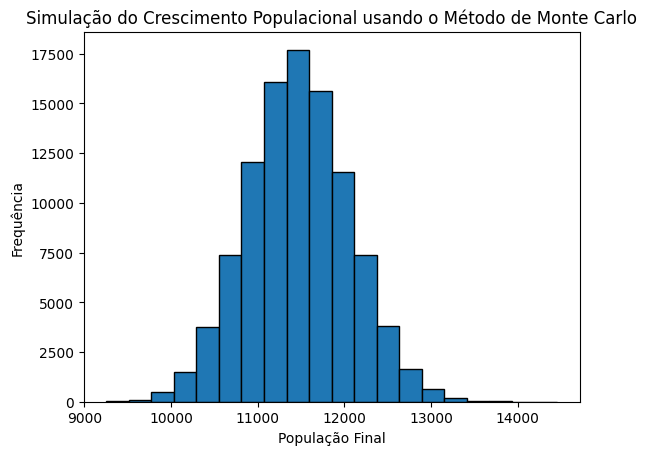

In [ ]:
populacao_inicial=1000
taxa_nascimento=0.1
taxa_morte=0.05
passos_tempo=50
n_simulacoes=100000

populacoes_finais = simular_populacao(populacao_inicial, taxa_nascimento, taxa_morte, passos_tempo, n_simulacoes)

plt.hist(populacoes_finais, bins=20, edgecolor='black')
plt.xlabel('População Final')
plt.ylabel('Frequência')
plt.title('Simulação do Crescimento Populacional usando o Método de Monte Carlo')
plt.show()